



# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#DataCleaning">Data Cleaning</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyzing data associated with information about 10,000 movies collected from The Movie Database (TMDb),this analyzing is interested in finding trends among the movies with high user ratings and high revenue movies and we will find some characteristics we will inspect from the point of view of filmmakers and investors in film industry

* This data analysis project is made to answer three questions:

     **1- What is the relationship between the movie's budget and People satisfaction with it?**
          > This question is so important for fim industry investors and movie makers since it is necessary to determine whether the production of films with simpler costs will make it more popular and thus knowledge of this will affect the determination of the chosen idea and methods of implementation.
     **2- What years have the movies made the most money?**
          > This give us an insight that Which clearly describes the size of the movie market profits over the past years. I took into account in it that the percentage of profit appears for films that exceeded the average profits over the years of study and ignored other films that achieved less profits so as not to disturb the number of films produced in one year from observing the percentage change in profit.
     **3- how popular are those movies that have made great profits?**
          > This question aims to explore the extent of the relationship between the popularity of the film and the amount of profit it makes, in order to find out whether or not focusing on producing films with more popularity would bring more profit to film producers.
          




##### Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Reading the dataset file
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Exploring dataset head
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Showing how many columns and rows are in the dataset
df.shape

(10866, 21)

In [5]:
# checking dataset columns name and data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Dataset Properties

#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

* id and imdb_id: unique identify numbers for each movie
* The popularity rating of a particular title on IMDb
* original_title: Movies titles
* cast: The group of actors who make up the movie
* homepage: Official link of the movie
* director: Director name
* tagline: Moving statement that expresses the movie
* keywords: Words for more categorization information, which summarize the subject of the movie
* overview: Summary for the movie story
* runtime: Number of movie runtime
* genres: words describe the movie category (Action,Adventure,Science Fiction,Thriller,...)
* production_companies: Names of production companies that produces the movie
* release_date: The date when a movie is released for the public to see
* vote_count: The number of votes
* vote_average: A weighted average scheme by IMDb, see https://help.imdb.com/article/imdb/track-movies-tv/the-vote-average-for-film-x-should-be-y-why-are-you-displaying-another-rating/G3RC8ZNFAGWNTX4L?ref_=helpart_nav_9#
* release_year: The year when a movie is released for the public to see
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [6]:
# Descriptive statistics of a dataset’s distribution
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# find duplicated rows
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Discovering the columns names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
# show if there is any movie with a budget zero dollar
df[df.budget_adj == 0].shape

(5696, 21)

In [10]:
# show if there is any movie with a revenue zero dollar
df[df.revenue_adj == 0].shape

(6016, 21)

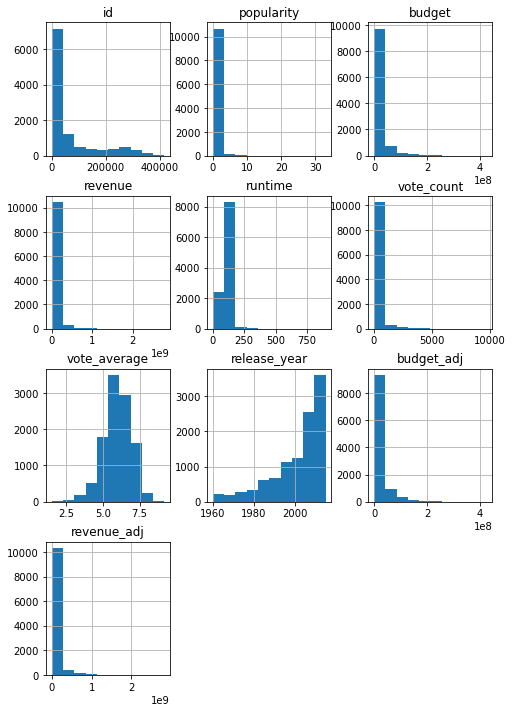

In [11]:
# show how the relations between dataset properties
df.hist(figsize = (8,12))
plt.savefig('df.hist.png');

In [12]:
# check id values
df.id.values

array([135397,  76341, 262500, ...,  39768,  21449,  22293], dtype=int64)

### Data Issues

####  After reviewing the characteristics of the data and samples of them, we have found the following problems

* (Quality Issue) Duplicate rows in the dataset
* (Tidy Issue) Unnecessary columns that describe properties not used in the analysis like ('homepage','tagline')
* (Tidy Issue) I found more than one column to describe the same property as in the 'release_date' and 'release_year' as well as in the budget and estimated profits in today's currency and not assessed in today's currency
* (Quality Issue)The presence of movies with a budget of zero dollar, as well as films with earned profits of zero dollar
* (Tidy Issue)Two columns are for ID and only one was sufficient
* popularity needs to convert to int type

<a id='DataCleaning'></a>
## Data Cleaning

#### Those data issues we will clean by 

     1- Deleting duplicate rows in the dataset
     2- Dropping  unnecessary columns that describe properties not used in the analysis like ('homepage','tagline')
     3- 'release_date' will be dropped 'release_year' is enough and so budget and revenue, We will use budget_adj and revenue_adj to have more equlitive insights
     4- Dropping movies with a budget of zero dollar, as well as films with earned profits of zero dollar
     5- We will use id, there is no need for imdb_id
     6- Converting popularity column datatype to int type

#### 1- Deleting duplicate rows

In [13]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

#### Test step 1

In [14]:
# find duplicated rows
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### 2- Dropping unnecessary columns that describe properties not used in the analysis

In [15]:
# drop unnecessary rows
df.drop(['homepage','tagline'], axis=1, inplace=True)

#### Test step 2

In [16]:
# show if it has dropped
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

#### 3- Dropping unnecessary columns 'release_date', 'budget', 'revenue'

In [17]:
# drop unnecessary rows
df.drop(['release_date', 'budget', 'revenue'], axis=1, inplace=True)

#### Test step 3

In [18]:
# show if it has dropped
df.columns

Index(['id', 'imdb_id', 'popularity', 'original_title', 'cast', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### 4- A- Dropping movies without a budget_adj

In [19]:
#Dropping movies with a budget_adj = 0
df = df.drop(df[df.budget_adj == 0].index)

#### Test step 4-A

In [20]:
# make sure it has been dropped
df[df.budget_adj == 0].shape

(0, 16)

#### 4- B- Dropping movies with a revenue_adj of zero dollar

In [21]:
#Dropping movies with a revenue_adj = 0
df = df.drop(df[df.revenue_adj == 0].index)

#### Test step 4-B

In [22]:
# make sure it has been dropped
df[df.revenue_adj == 0].shape

(0, 16)

#### 5- Dropping unnecessary column 'imdb_id'

In [23]:
# dropping unnecessary rows
df.drop(['imdb_id'], axis=1, inplace=True)

#### Test step 5

In [24]:
# making sure it has done
df.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'keywords',
       'overview', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

#### 6- Converting 'popularity' to int type

In [25]:
# Converting 'popularity' to int type
df.popularity = df.popularity.astype(int)

#### Test step 6

In [26]:
# showing the data type of popularity
df.popularity.dtype

dtype('int32')

### Storing a clean copy of dataset

In [27]:
# Saving a clear dataset copy to use in future
df.to_csv('clean_dataset.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 What is the relationship between the movie's budget and People satisfaction with it?

### Reading clean dataset

In [28]:
# opening clean dataset
df = pd.read_csv('clean_dataset.csv')

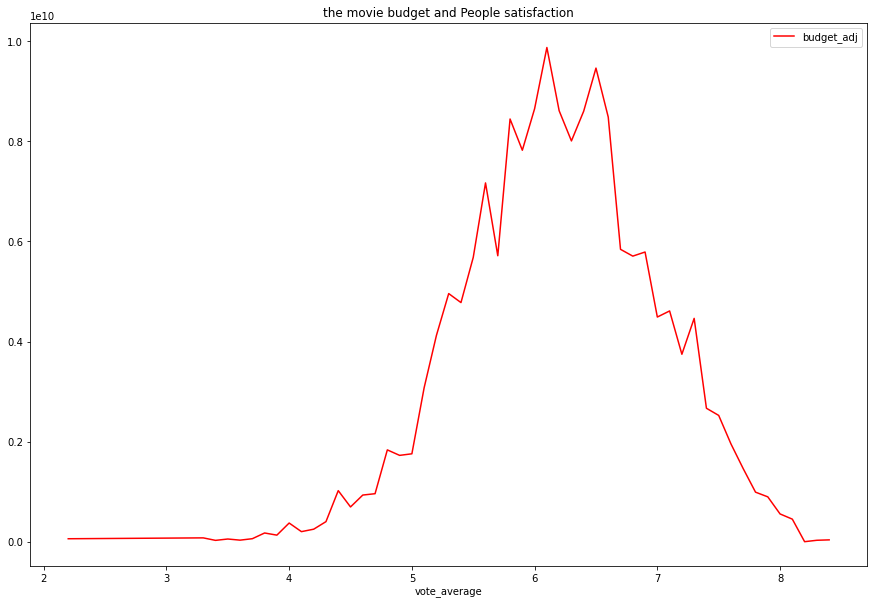

In [29]:
# making visualization to answer question 1
df.groupby('vote_average')['budget_adj'].sum().plot(kind='line',
                                                     title='the movie budget and People satisfaction',
                                                     color='red',
                                                     legend=True,
                                                     figsize=(15,10))
plt.savefig('movie_budget-people_satisfaction.png');

### Research Question 2  What years have the movies made the most money?

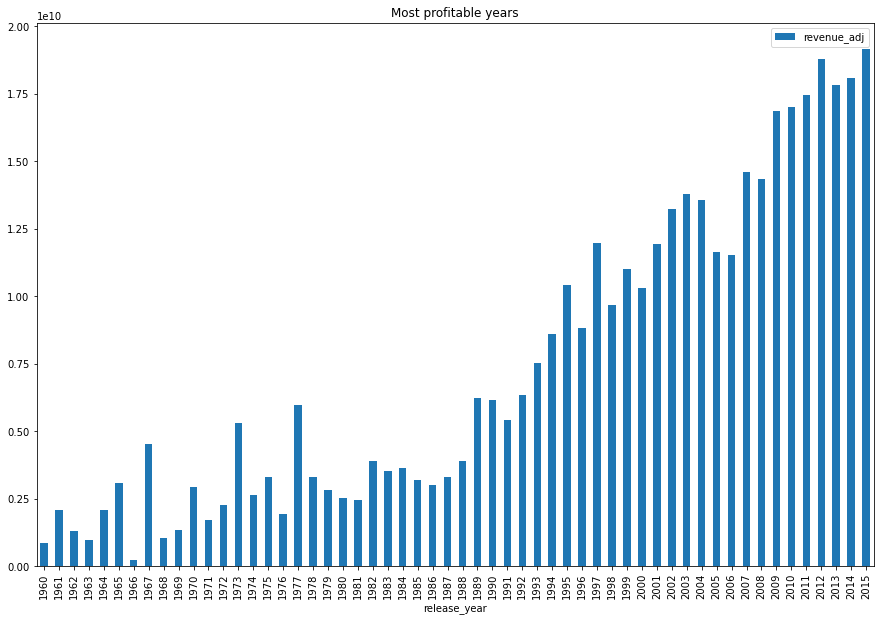

In [30]:
# making visualization to answer question 2
df[df.revenue_adj > df.revenue_adj.mean()].groupby('release_year')['revenue_adj'].sum().plot(kind='bar',
                                                     title='Most profitable years',
                                                     legend=True,
                                                     figsize=(15,10))
plt.savefig('Most profitable years.png');

### Research Question 3 how popular are those movies that have made great profits?

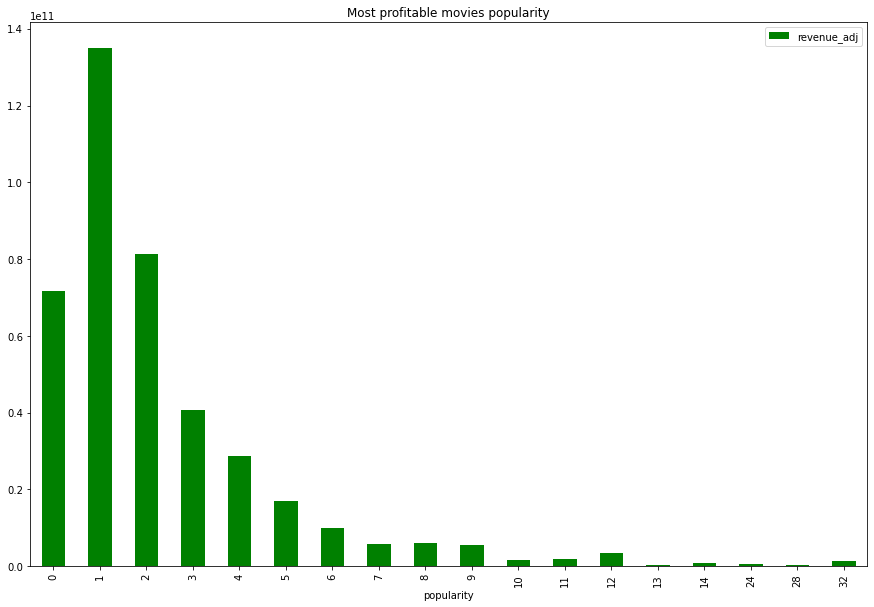

In [31]:
# making visualization to answer question 3
df[df.revenue_adj > df.revenue_adj.mean()].groupby('popularity')['revenue_adj'].sum().plot(kind='bar',
                                                     title='Most profitable movies popularity',
                                                     color='green',
                                                     legend=True,
                                                     figsize=(15,10))
plt.savefig('Most profitable movies popularity.png');

<a id='conclusions'></a>
## Conclusions

* This data analysis project is made to answer three questions:

         1- What is the relationship between the movie's budget and People satisfaction with it?
         2- What years have the movies made the most money?
         3- how popular are those movies that have made great profits?
    
* These three questions are so important to answer because it brings an imagination on cinema investment for filmmakers and people who want to investigate in movies

* The answers give us insights about what should be if we want to know how to make a good movie

     **1- I found that the most rated movies are not always the most high budget movies**
          > As we can see in the presented graph ( 'the movie budget and People satisfaction' ), the films with lower budgets obtained a low voting rate and the voting rate began to rise with the large size of the budget, until voting reached its peak, but the continued rise in budgets after that was met with a further decrease in the voting rate.
     **2- I released that movies makes more profits by years**
          > In the following figure ( 'years have the movies made the most money' ), we notice a large and almost regular increase in the rate of increase in profits for high-profit films over the years, which indicates the growth of the film industry significantly and the high percentage of income earned from the most successful films over time.
     **3- It has been noted that the less popular movies made the most profits**
          > As for the third figure ( 'the popularity of great profit movies' ), we find that the most profitable films were clearly with the smaller rating number, and this may be due to the site’s adoption of a rating system that gives a larger number to the less popular films, while the most popular films are at the top of the list in smaller numbers, and the likely conclusion here is that the achievement of films For greater profits, it increases its popularity.






<a id='limitations'></a>
## limitations

#### Through this analyzing project I faced many limitations that reduced the potential benefits of dataset analyzing, these limitations were: 
-------------------------------------
   * There is no description of every feature of the data. This is so important to understand the data features and can understand relations between it
       > To overcome this obstacle, I had to search on the Internet and use extrapolation to try to understand the data correctly and thus make a correct analysis
   * Jupyter notebook doesn't appear all dataset contents
       > To overcome this obstacle, I had to work using other analysis tools, such as importing the data file in Microsoft Excel, as well as conducting many data integrity tests using the code in order to ensure the integrity of the data and thus the integrity of the analyzes based on it. I deleted these codes because they were not useful in the project and left only what It can be used
   * There are many missing values related to budget and revenue 
       > Which leads me to delete rows have those missing value in order to not have an accurate insights
   * The popularity feature represented by a long float number which is very difficult to use in visualisation
       > It is easier to use integer numbers in visualisation so I decided to convert the popularity values to int especially as these values have lots of decimal fraction numbers
    





In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295